# Source Code

In this notebook, I will be documenting the entire coding process involved in my thesis -- from data preprocessing to the production of figures. I will also include discussions of methodology and results in this notebook.

## Data Integration

This section shows the process of merging all the measurements obtained from the air quality monitor at the Lung Center of the Philippines into one CSV file. 

### Path to raw data

The data can be found inside `/cxnfs/Mark/Data/compressed_data`. Inside the directory are compressed files containing the air quality measurements. The names of the compressed files are the following:

In [4]:
!ls /cxnfs/Mark/Data/compressed_data

01.01.2020.tar.gz  08.04.2020.tar.gz  16.02.2020.tar.gz  24.01.2020.tar.gz
01.02.2020.tar.gz  08.05.2020.tar.gz  16.03.2020.tar.gz  24.02.2020.tar.gz
01.03.2020.tar.gz  08.07.2020.tar.gz  16.04.2020.tar.gz  24.03.2020.tar.gz
01.04.2020.tar.gz  09.01.2020.tar.gz  16.05.2020.tar.gz  24.04.2020.tar.gz
01.05.2020.tar.gz  09.02.2020.tar.gz  16.06.2020.tar.gz  25.01.2020.tar.gz
01.07.2020.tar.gz  09.03.2020.tar.gz  17.01.2020.tar.gz  25.02.2020.tar.gz
02.01.2020.tar.gz  09.04.2020.tar.gz  17.02.2020.tar.gz  25.03.2020.tar.gz
02.02.2020.tar.gz  09.05.2020.tar.gz  17.03.2020.tar.gz  25.04.2020.tar.gz
02.03.2020.tar.gz  09.07.2020.tar.gz  17.04.2020.tar.gz  25.06.2020.tar.gz
02.04.2020.tar.gz  10.01.2020.tar.gz  17.05.2020.tar.gz  26.01.2020.tar.gz
02.05.2020.tar.gz  10.02.2020.tar.gz  17.06.2020.tar.gz  26.02.2020.tar.gz
02.07.2020.tar.gz  10.03.2020.tar.gz  18.02.2020.tar.gz  26.03.2020.tar.gz
03.01.2020.tar.gz  10.04.2020.tar.gz  18.03.2020.tar.gz  26.04.2020.tar.gz
03.02.2020.tar.gz  10.05.

In total, there are 179 files. Observe above that we can classify the files by their file extensions -- `tar.gz` and `.txt`

In [13]:
!ls /cxnfs/Mark/Data/compressed_data | wc -l 

179


2 out of the 179 files have `.txt` extensions.

In [30]:
!ls /cxnfs/Mark/Data/compressed_data/*txt | wc -l 

2


While the 177 remaining files have `tar.gz` extensions.

In [32]:
!ls /cxnfs/Mark/Data/compressed_data/*.gz | wc -l 

177


### Unzipping compressed files to another directory

Now, let us unzip the files with `tar.gz` extension to a folder we will name as `uncompressed_data` -- which will also be found at `/cxnfs/Mark/Data/`. But first, let us create `uncompressed_data`. 

In [23]:
! mkdir /cxnfs/Mark/Data/uncompressed_data 

Then, we extract the compressed files. We can print out the status of extracting each file by modifying `xzf` to `xzvf` in the cell below this. However, in this case we choose not so as to not crash the notebook. If you choose to print out each iteration of the extraction, perform the command below in a terminal.

In [25]:
!for i in /cxnfs/Mark/Data/compressed_data/*.gz; do tar -xzf "$i" -C /cxnfs/Mark/Data/uncompressed_data ; done

Observe that we have extracted 176 folders from 177 `tar.gz` files.

In [30]:
! ls /cxnfs/Mark/Data/uncompressed_data | wc -l

176


This is because `10.06.2020.tar.gz` do not contain directories or files when unzipped -- observe below that it only has 45 bytes.

In [34]:
! ls -lh /cxnfs/Mark/Data/compressed_data/*.gz

-rw-r--r-- 2 jovyan users 281K Jun 14  2022 /cxnfs/Mark/Data/compressed_data/01.01.2020.tar.gz
-rw-r--r-- 2 jovyan users 282K Jun 14  2022 /cxnfs/Mark/Data/compressed_data/01.02.2020.tar.gz
-rw-r--r-- 2 jovyan users 277K Jun 14  2022 /cxnfs/Mark/Data/compressed_data/01.03.2020.tar.gz
-rw-r--r-- 2 jovyan users 274K Jun 14  2022 /cxnfs/Mark/Data/compressed_data/01.04.2020.tar.gz
-rw-r--r-- 2 jovyan users 276K Jun 14  2022 /cxnfs/Mark/Data/compressed_data/01.05.2020.tar.gz
-rw-r--r-- 2 jovyan users 276K Jun 14  2022 /cxnfs/Mark/Data/compressed_data/01.07.2020.tar.gz
-rw-r--r-- 2 jovyan users 279K Jun 14  2022 /cxnfs/Mark/Data/compressed_data/02.01.2020.tar.gz
-rw-r--r-- 2 jovyan users 277K Jun 14  2022 /cxnfs/Mark/Data/compressed_data/02.02.2020.tar.gz
-rw-r--r-- 2 jovyan users 279K Jun 14  2022 /cxnfs/Mark/Data/compressed_data/02.03.2020.tar.gz
-rw-r--r-- 2 jovyan users 271K Jun 14  2022 /cxnfs/Mark/Data/compressed_data/02.04.2020.tar.gz
-rw-r--r-- 2 jovyan users 276K Jun 14  2022 /cxnfs

### Copying remaining files to another directory

Let us also copy the two text files located at `/cxnfs/Mark/Data/compressed_data/` to `/cxnfs/Mark/Data/uncompressed_data/` so that the `uncompressed_data` directory contain all the measurements uncompressed

In [37]:
! for i in /cxnfs/Mark/Data/compressed_data/*.txt; do cp -v $i /cxnfs/Mark/Data/uncompressed_data ; done


'/cxnfs/Mark/Data/compressed_data/28.12.2019.txt' -> '/cxnfs/Mark/Data/uncompressed_data/28.12.2019.txt'
'/cxnfs/Mark/Data/compressed_data/29.12.2019.txt' -> '/cxnfs/Mark/Data/uncompressed_data/29.12.2019.txt'


Let us now check that there should now be 178 files in the `uncompressed_data` directory (2 text files and 176 directories)

In [39]:
!ls /cxnfs/Mark/Data/uncompressed_data | wc -l

178


We also count the number of text files in the `uncompressed_data` directory. Note that we expect 2 `.txt` files since there are only 2 `.txt` files from `compressed_data`

In [41]:
!ls /cxnfs/Mark/Data/uncompressed_data/*.txt | wc -l

2


### Getting absolute paths of nested files

We want to get a list of the absolute paths of all the nested files so as to make reading and opening these files easier using Python. Fortunately, we can easily accomplish this in the terminal. I will now create a plain text file called `absolutepaths.txt` which I will create at `/cxnfs/Mark/Data/` and will contain the absolute paths of the files located at `/cxnfs/Mark/Data/uncompressed_data`. Below, `find /cxnfs/Mark/Data/uncompressed_data -type f ` gets all the absolute paths of all the files inside `/cxnfs/Mark/Data/uncompressed_data`. Then, `>` redirects the absolute paths and writes it to a text file which I named as `absolutepaths.txt`, located at `/cxnfs/Mark/Data`.

In [54]:
!find /cxnfs/Mark/Data/uncompressed_data -type f > /cxnfs/Mark/Data/absolutepaths.txt

As a sanity check, inside `absolutepaths.txt`, we expect two absolute paths to have `.txt` file extension.

In [69]:
!find /cxnfs/Mark/Data/uncompressed_data -type f -name "*.txt"

/cxnfs/Mark/Data/uncompressed_data/28.12.2019.txt
/cxnfs/Mark/Data/uncompressed_data/29.12.2019.txt


In total, `absolutepaths.txt` must have the following number of absolute paths

In [64]:
!find /cxnfs/Mark/Data/uncompressed_data -type f | wc -l

250399


### Information structure inside text files

Aside from the absolute paths, we also need to know how the information are structured inside the text files for us to pinpoint the observable measured and the corresponding measurement value. After observing and opening text files one by one, there seems to be two ways information are encoded: 

Case 1) values separated by semicolon -- similar to a CSV file but the delimiter is ";" 

Case 2) a measurement consisting of two consecutive lines 

Case 1 can easily be opened using the `read_csv` function from the `Pandas` Python package and setting the delimiter to `;`.

As for Case 2, by a measurement consisting of two consecutive lines, I mean that a measurement of an observable are encoded as two lines in a plain text file such that the first line -- which tells us about what observable is measured -- maps to the measured value and time of measurement on the second line.

Here is a figure that tries to clarify how the information inside a Case 2 text file are structured. When you open the text file, you find information that is structured similar to the figure below. Inside, a line may start with the following characters: J,S,M,K. Thus, for convenience, we can denote or describe a line by its first character (e.g K-line, M-line, etc.).

The J and S lines tell us that where the measurements are taken and using what instrument. Since all the measurements are from the same monitoring station and location, we expect all the text files to have the same J and S lines (I will show this below). On the other hand, the M and K lines are the consecutive lines I was talking about earlier that tell us what is measured, its value, and when.


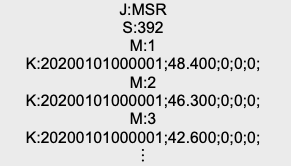

Numbers after the colon on the M lines map to the observable being measured. The figure below shows the conversion from numbers to observables.

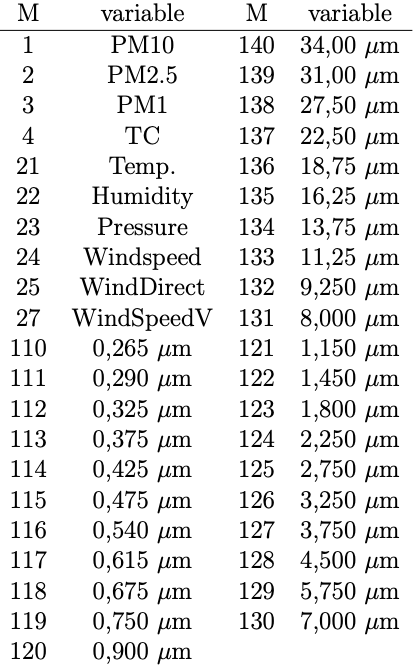

For K lines, we can get the date and time of the measurement and the measurement value such that: `K:<yyyymmddhhmmss>;<sensor_value>;0;0;0;`. Between the colon and first semicolon, we get the year, month, day, hour, minute, second that the measurement is made. Between the first semicolon and the second semicolon, we get the measurement value. Values between succeeding semicolons do not represent anything.

As an example, suppose we observe the following two lines: 

M:1

K:20200227013003;32;0;1;0;

This means that the measured observable is PM10, was measured on $01:30:03$ AM, February 27, 2020, and have a measured value of 32 $\mu g$ per cubic meter

### Merging measurements to one CSV file using Python

We now know the absolute paths of all the plain text files (pertaining to the measurements) and as well as the two types of information structure inside the text files. Now, we proceed to use Python along with the Pandas package to extract the information from the text files and merge all to one CSV file. Let us first import the packages I will be using to merge the measurements to one single CSV file (as well as will be using later on as we play around with the data) and create variables which I will use to store the absolute paths.

In [1]:
import pandas as pd
import numpy as np
#open absolutepaths.txt as a csv
all_absolute_paths = pd.read_csv('/cxnfs/Mark/Data/absolutepaths.txt', header = None) 
#absolute paths of case 2 text files
absolute_paths_twoliner = all_absolute_paths[all_absolute_paths.iloc[:,0].apply(lambda x: True if x[-1] == 'T' else False)]
absolute_paths_twoliner = absolute_paths_twoliner.iloc[:,0].to_list()
#absolute paths of case 1 text files
absolute_paths_semicolon = all_absolute_paths[~(all_absolute_paths.iloc[:,0].apply(lambda x: True if x[-1] == 'T' else False))]
absolute_paths_semicolon = absolute_paths_semicolon.iloc[:,0].to_list()

Now, I will create two functions: one which extracts the lines from the the text files ( called `txtfile_to_generator_obj`) and another which processes the lines to infer the measurements (called `get_info_from_txtfiles`).

In [22]:
#creating a function to get data from a text file
def txtfile_to_generator_obj(path):     # path must be the absolute path of the text file
    #Appends each line of the text file to generator object, 
    #where a text file contain measurements for a particular day
    with open(path) as f: #this lines opens, reads and closes file f
        for line in f: #go over each line of the text file
            # an empty string has a True boolean value => not('') will return True
            #str.strip() removes leading and trailing whitespaces
            if not line.strip(): # if line only contains the newline char or is an empty string, proceed to next line
                continue                 
            yield line.strip() #otherwise, strip newline character and store the line inside a generator

#function to compile all text files to one Pandas Series         
def get_info_from_txtfiles(paths):#paths is an iterable such as a list
    #paths is expected to be an iterable containing absolute paths of the text files that follow case 2
    #create a dataframe for each text file and then merge to one dataframe
    df = pd.concat([pd.DataFrame(txtfile_to_generator_obj(filepath)) for filepath in paths])
    series = df.iloc[:, 0] #converting dataframe to a series
    #dataframe containing the unnecessary lines -- J and S lines
    misc_data = series[~(series.apply(lambda x: x[0]== 'M' or x[0] == 'K'))]
    #removing uneccessary lines -- pertaining to J and S lines
    series = series[series.apply(lambda x: x[0]== 'M' or x[0] == 'K')]
    
    #resetting dataframe index
    series = series.reset_index(drop = True)
    # since m and k lines must alternate, we describe k and m entries as odd and even indexes entries respectively
    #purpose of this is to check whether the m and k lines are alternating
    #if not, then our algorithm will definitely produce a wrong mapping 
    k_val = series[series.index %2 != 0] # k entries as odd
    m_val = series[series.index %2 == 0] # m entries as even
    
    #checking if all odd numbered indexes have expected entries
    if (m_val.apply(lambda x: x[0] != 'M')).sum() == 0: 
        print('no missing m entries')
    else: #something wrong with data encoding 
        print('some entries are incorrect for m entries')
        print(m_val[m_val.apply(lambda x: x[0] != 'M')])

    #checking if all odd numbered indexes have correct entries
    if (k_val.apply(lambda x: x[0] != 'K')).sum() == 0:
        print('no missing k entries')
    else: #something wrong with data encoding
        print('some entries are incorrect for k entries')
        print(k_val[k_val.apply(lambda x: x[0] != 'K')])
    return series, misc_data

Finally, let us merge all text files to a single CSV file. First, let us merge the case 2 text files. Moreover, if all M lines have a K line pair, then we expect the following lines to be printed out in the next cell:

`no missing m entries` \
`no missing k entries`

In [64]:

path = absolute_paths_twoliner #path of each files
#merge case 2 files to a dataframe
df,misc_df = get_info_from_txtfiles(path)


no missing m entries
no missing k entries


We can also check how many S and J lines there are in total and as well whether there are lines that do not start with J, S, M, and K. We can see that there are 250,396 S and J lines each and that there are no unexpected starting characters (starting characters are among J, S, M, and K)

In [65]:
print("Number of S lines {}".format(misc_df.apply(lambda x: x[0] == 'S').sum() 
                                   )
     )

print("Number of J lines {}".format(misc_df.apply(lambda x: x[0] == 'J').sum() 
                                   )
     )

print("Number of lines that are not S,J,M,K lines {}".format(misc_df.apply(lambda x: x[0]!= 'S' and x[0]!= 'J').sum()))



Number of S lines 250396
Number of J lines 250396
Number of lines that are not S,J,M,K lines 0


Now, let us merge the information from the case 1 files to the case 2 files. Then, let us save it as a CSV file to be saved in `/cxnfs/Mark/Data/` and which I will name as `complete_data.csv`

In [69]:
#transforming data to be more readable
m_val = df[df.apply(lambda x: x[0] == 'M')]
k_val = df[df.apply(lambda x: x[0] == 'K')]
df = pd.DataFrame( {'sensor_num': m_val.reset_index(drop = True), 'K': k_val.reset_index(drop = True)} )
df['sensor_num'] = df['sensor_num'].apply(lambda x: x[2:])
df['K'] = df['K'].apply(lambda x: x.split(';'))
df['yyyymmddhhmmss'] = df.K.apply(lambda x: x[0][2:])
df['sensor_val'] = df.K.apply(lambda x: x[1])
df = df.iloc[:, [0, 2,3]]
df['sensor_val'] = df.sensor_val.apply(float)
df_1 = df.pivot_table(values = 'sensor_val', index = 'yyyymmddhhmmss', columns = 'sensor_num', aggfunc = 'first')

#merging two more text files not embedded in directories
df_2 = pd.read_csv('/cxnfs/Mark/Data/uncompressed_data/28.12.2019.txt', sep = ';', index_col = 0)
df_3 = pd.read_csv('/cxnfs/Mark/Data/uncompressed_data/29.12.2019.txt', sep = ';', index_col = 0)
#drop a column if all entries are NA
df_2 = df_2.dropna(axis = 'columns', how = 'all')
df_3 = df_3.dropna(axis = 'columns', how = 'all')
df_4 = pd.concat([df_2, df_3])

#changing column names of df_1
mapper = pd.read_csv('/cxnfs/Mark/Data/var_mapping.csv', index_col = 0) 
mapper_dict = {str(num):var for num,var in zip(mapper.sensor_number, mapper.variable)}
df_1 = df_1.rename(columns = mapper_dict)
#converting df_4 col names to match df_1
sensor_name = list(df_1.columns)
final_df_col = np.array(sensor_name[-8:-2]+ [sensor_name[0]]+ [sensor_name[-9]] + sensor_name[-2:] + sensor_name[1:-9])

#limiting df_4 columns to match df_1
df_5 = df_4.iloc[:, :-31]
df_5.columns = final_df_col

def conv_datetime_format(date_time):# converting datetime format of df_4 to match df1
    # it can be shown that the spaces in string between time and day are either two or one
    if len(date_time.split('  ')) == 2: #if two spaces
        dt_pair = date_time.split('  ')
    else: 
        dt_pair = date_time.split(' ') #if one space
    d = dt_pair[0].split('.')
    t = dt_pair[1].split(':')
    t = [str(0)+n if len(n)==1 else n for n in t]
    d.reverse()
    return "".join(d+t)

df_5.index = df_5.index.to_series().apply(lambda x: conv_datetime_format(x))
#final data
tot_df = pd.concat([df_1, df_5])
tot_df = tot_df.sort_index(ascending = True)
tot_df.to_csv('/cxnfs/Mark/Data/complete_data.csv')

In [36]:
df_ver2 = pd.read_csv('/cxnfs/Mark/Data/complete_data.csv', index_col =0,parse_dates = True)
df_ver2 = df_ver2.sort_index()

In [37]:
df_ver1 = pd.read_csv('/home/jovyan/complete_data.csv', index_col = 0, parse_dates = True)
df_ver1 = df_ver1.sort_index()

## Data Cleaning